In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


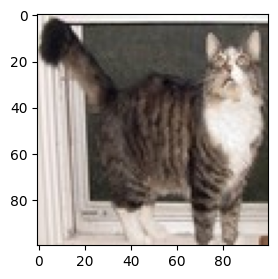

In [5]:
index = random.randint(0, len(X_train))
plt.figure(figsize=(3, 3))
plt.imshow(X_train[index])

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\usppc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)))   
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9917 - loss: 0.0332 - val_accuracy: 0.6650 - val_loss: 1.4927
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9925 - loss: 0.0355 - val_accuracy: 0.6675 - val_loss: 1.4194
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9993 - loss: 0.0142 - val_accuracy: 0.6675 - val_loss: 1.6788
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.6800 - val_loss: 1.6711
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.6800 - val_loss: 1.7576
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6800 - val_loss: 1.8066
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 1.0000 - loss: 9.7132e-04 - val_accuracy: 0.6850 - val_loss: 1.8540
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 1.0000 - loss: 8.1429e-04 - val_accuracy

In [30]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6556 - loss: 2.1795


[1.9353290796279907, 0.6800000071525574]

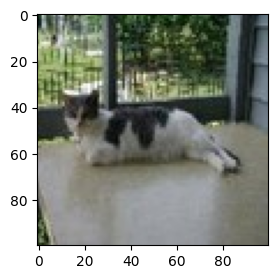

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The image shows a Dog


In [64]:
idx2 = random.randint(0, len(X_test)) 
plt.figure(figsize=(3, 3))
plt.imshow(X_test[idx2])
plt.show()
y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if y_pred == 0:
    print("The image shows a Dog")
else:
    print("The image shows a Cat")